In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 


In [3]:
df_og=pd.read_csv('weight-height.csv')
df=df_og.head(25)
df=df.drop('Gender' , axis=1)
df=df.astype(int)
df

,Height,Weight
0,73,241
1,68,162
2,74,212
3,71,220
4,69,206
5,67,152
6,68,183
7,68,167
8,67,175
9,63,156


Text(0, 0.5, 'Height')

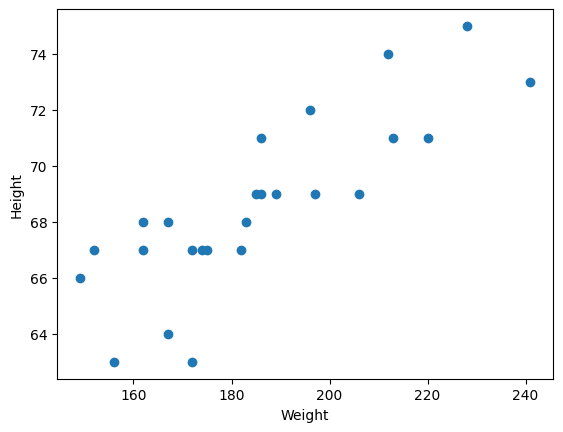

In [4]:
plt.scatter(df['Weight'] , df['Height']);
plt.xlabel('Weight')
plt.ylabel('Height')

In [5]:
# finding correlation
df.corr()
# output shows that height and weight are highly corealated

,Height,Weight
Height,1.000000,0.822047
Weight,0.822047,1.000000


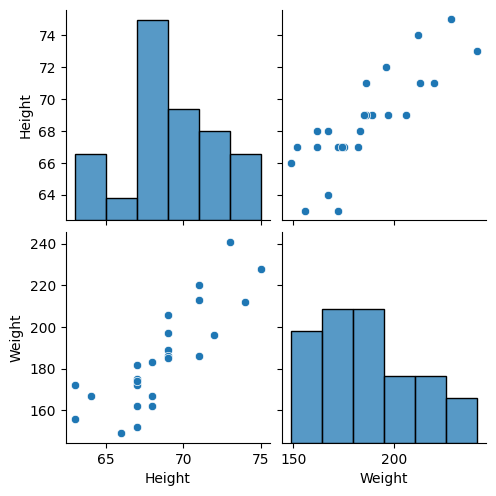

In [6]:
import seaborn as sns
sns.pairplot(df)

In [7]:
# Independent and dependent features
# Always make sure that the independent feature should be in the form of dataframe or 2d array
# we can have the dependent feature as a series
x=df[['Weight']]
y=df['Height']
type(x)

pandas.core.frame.DataFrame

In [8]:
x.head()

,Weight
0,241
1,162
2,212
3,220
4,206


In [9]:
y

0     73
1     68
2     74
3     71
4     69
5     67
6     68
7     68
8     67
9     63
10    71
11    71
12    64
13    69
14    69
15    67
16    72
17    63
18    69
19    67
20    67
21    69
22    66
23    75
24    67
Name: Height, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test= train_test_split(x, y , test_size=0.25, random_state=42)


In [11]:
x_train.shape

(18, 1)

In [12]:
# standardization 
from sklearn.preprocessing import StandardScaler


In [13]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)

In [14]:
x_test= scaler.transform(x_test)

In [15]:
x_test

array([[-0.24385656],
       [ 0.85349794],
       [ 3.20497187],
       [ 2.52565718],
       [ 1.74183254],
       [-1.2367011 ],
       [ 0.48771311]])

In [16]:
# apply simple linear regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression(n_jobs=-1)


In [17]:
lr.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [18]:
lr.coef_
# the output is beta1 or coefficient
# means that 1 unit movement in the weight values leads to 1.73 movement in the height value

array([1.73022032])

In [19]:
lr.intercept_
# output is beta0 or intercept

np.float64(68.0)

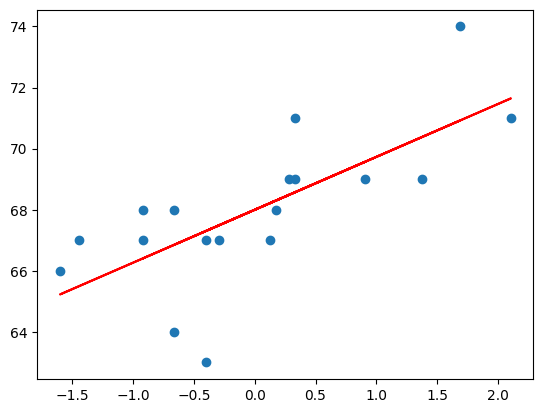

In [32]:
# plot Training data  and best fit line
plt.scatter(x_train , y_train)
plt.plot(x_train , lr.predict(x_train), color='red' )

# prediction of test data
1. Predicted height output= intercept + coef_(Weights)
2. y_pred_test= 68 + 1.73(x_test)

In [21]:
# prediction for test data
y_pred=lr.predict(x_test)
y_pred

array([67.57807443, 69.47673948, 73.54530744, 72.36994337, 71.01375405,
       65.86023463, 68.84385113])

In [22]:
# performance metrics
from sklearn.metrics import mean_squared_error , mean_absolute_error
mse=mean_squared_error(y_test , y_pred)
mae=mean_absolute_error(y_test , y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

3.160155081106272
1.329548081368474
1.7776825028970364


# R square
Formula 
 * R^2= 1- SSR/SST
R^2 = coefficient of determination SSR = sum of squares of residuals SST = total sum of squares


In [23]:
from sklearn.metrics import r2_score


In [24]:
score=r2_score(y_test , y_pred)

In [25]:
print(score)

0.7742746370638377


# Adjusted R square
ar2= 1-[(1-R2)*(n-1)/ (n-k-1)]
where :
  * R2 : the R2 of the model
  * N: number of observations
  * k: the number of predictor variables

In [26]:
# display the adjusted r squared
ar2= 1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
ar2

0.7291295644766053

In [27]:
# OLS Liniear regression
import statsmodels.api as sm
model=sm.OLS(y_train, x_train).fit()


In [28]:
prediction=model.predict(x_test)
prediction

array([-0.42192557,  1.47673948,  5.54530744,  4.36994337,  3.01375405,
       -2.13976537,  0.84385113])

In [29]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.001
Model:                            OLS   Adj. R-squared (uncentered):             -0.058
Method:                 Least Squares   F-statistic:                            0.01100
Date:                Mon, 19 May 2025   Prob (F-statistic):                       0.918
Time:                        14:40:52   Log-Likelihood:                         -101.50
No. Observations:                  18   AIC:                                      205.0
Df Residuals:                      17   BIC:                                      205.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\sawan\AppData\Roaming\Python\Python313\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [30]:
df

,Height,Weight
0,73,241
1,68,162
2,74,212
3,71,220
4,69,206
5,67,152
6,68,183
7,68,167
8,67,175
9,63,156


In [31]:
# prediction for new data
# before making any prediction on new data make sure to perform scaling transformation
lr.predict(scaler.transform([[220]]))
# lr.predict([[220]])

C:\Users\sawan\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([71.64664239])